In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import datasets

# Decision Tree Problem
    # Problem Statement: To Predict the the right class accurately
    # Data: Iris.csv
    Sepal Length (in cm)
    Sepal Width (in cm)
    Petal Length (in cm)
    Petal Width (in cm)
    Species
    # Modelling: Decision Tree and Random Forest
    # Evaluation of the Model
    # Visualisation of the tree model

In [5]:
iris = pd.read_csv("Iris (1).csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


No null values

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


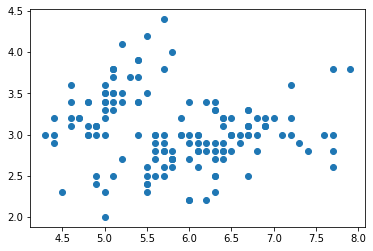

In [10]:
plt.scatter(iris["SepalLengthCm"], iris["SepalWidthCm"]);

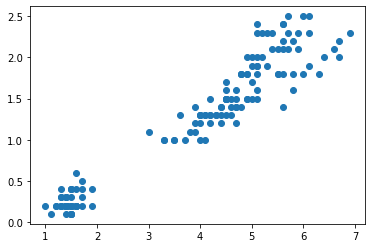

In [11]:
plt.scatter(iris["PetalLengthCm"], iris["PetalWidthCm"]);

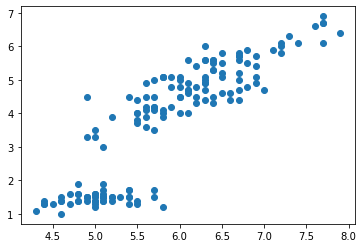

In [13]:
plt.scatter(iris["SepalLengthCm"], iris["PetalLengthCm"]);

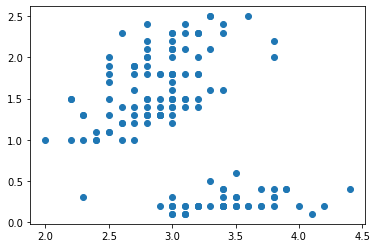

In [14]:
plt.scatter(iris["SepalWidthCm"], iris["PetalWidthCm"]);

# Modelling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
X = iris.drop("Species", axis = 1)
y = iris["Species"]
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
np.random.seed(42)
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_test, y_test)

1.0

In [24]:
y_preds = model.predict(X_test)
y_preds

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [26]:
pd.value_counts(y_preds)

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
dtype: int64

# Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
acc_score = accuracy_score(y_test, y_preds)
acc_score

1.0

In [34]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Visualisation 

In [40]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'Id <= 100.5\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

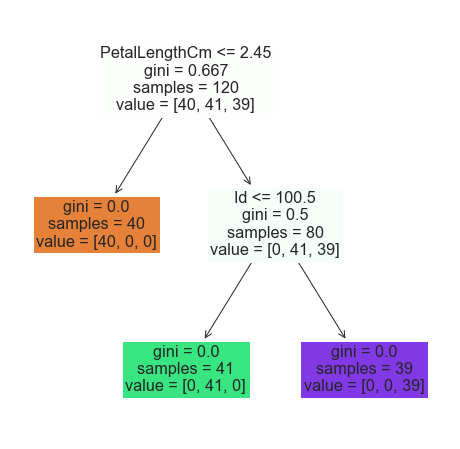

In [50]:
plt.figure(figsize=(8, 8))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

In [47]:
plt.figure(figsize=(20, 20))
export_graphviz(model,  filled=True, rounded=True, special_characters=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<X<SUB>3</SUB> &le; 2.45<br/>gini = 0.667<br/>samples = 120<br/>value = [40, 41, 39]>, fillcolor="#fdfffd"] ;\n1 [label=<gini = 0.0<br/>samples = 40<br/>value = [40, 0, 0]>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>0</SUB> &le; 100.5<br/>gini = 0.5<br/>samples = 80<br/>value = [0, 41, 39]>, fillcolor="#f5fef9"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<gini = 0.0<br/>samples = 41<br/>value = [0, 41, 0]>, fillcolor="#39e581"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 39<br/>value = [0, 0, 39]>, fillcolor="#8139e5"] ;\n2 -> 4 ;\n}'